## Instacart Grocery Basket Analysis
### List of Content
##### 01 Importing Libraries
##### 02 Importing Datasets
##### 03 Security Implications
##### 04 Regional Segmentation
##### 05 Exclusion Flag for Low-Activity Customers
##### 06 Customer Profiling
##### 07 Visualization of Customer Profile Distribution
##### 08 Aggregation of Customer Profiles
##### 09 Comparison of Customer Profiles Across Regions and Departments
##### 10 Other Visualizations
##### 11 Recommendations

#### 01 Importing Libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### 02 Importing Dataset

In [2]:
# Path
base_path = Path.home()
project_path = base_path / 'Desktop' / 'Career Foundry' / 'Course' / 'Data Immersion' / '4 Python' / '07.2025 Instacart Basket Analysis - Monika Kaniewska'

In [4]:
# Importing dataset
file_path = project_path / '02 Data' / 'Prepared Data' / 'orders_products_customer.pkl'
df_ords_prods_cust = pd.read_pickle(file_path)

In [8]:
# Converting numbers to float format
pd.set_option('display.float_format', '{:.2f}'.format)

In [19]:
# Making all columns visible
pd.options.display.max_columns = None

#### 03 Security Implications

In [9]:
# Checking the top rows of the dataframe
df_ords_prods_cust.head(3)

,order_id,user_id,purchase_sequence,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spender type,median_days_since_prior_order,order frequency,first_name,surname,gender,state,age,date_joined,n_dependants,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.00,both,Mid-range product,Regular busy,Average orders,10,New customer,6.37,Low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.50,both,Mid-range product,Regular busy,Average orders,10,New customer,6.37,Low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.40,both,Low-range product,Regular busy,Average orders,10,New customer,6.37,Low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


Considering PII, particularly sensitive data in df_ords_prods_cust dataset includes first_name and surname, which are direct identifiers. To comply with data protection regulations such as the GDPR, it is advisable to remove these columns from the dataset. This helps to minimize the risk of identifying individuals and ensures better privacy protection.

In [ ]:
# Deleting 'first_name', 'surname', '_merge' columns
df_ords_prods_cust = df_ords_prods_cust.drop(columns=['first_name','surname','_merge'])

In [16]:
# Renaming column "Busiest_days" to "busiest_days"
df_ords_prods_cust.rename(columns = {'Busiest_days' : 'busiest_days'}, inplace = True)

In [18]:
# Checking the output after deleting and renaming columns
df_ords_prods_cust.head(3)

,order_id,user_id,purchase_sequence,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spender type,median_days_since_prior_order,order frequency,gender,state,age,date_joined,n_dependants,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.00,Mid-range product,Regular busy,Average orders,10,New customer,6.37,Low spender,20.50,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.50,Mid-range product,Regular busy,Average orders,10,New customer,6.37,Low spender,20.50,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.40,Low-range product,Regular busy,Average orders,10,New customer,6.37,Low spender,20.50,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


Particularly sensitive data has been successfully deleted from the dataset.

#### 04 Regional Segmentation

In [27]:
# Defining U.S. regions
northeast = ['Maine', 'New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio', 'North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [22]:
# Assigning states to regions

In [31]:
# Northeast
df_ords_prods_cust.loc[df_ords_prods_cust['state'].isin(northeast), 'region'] = 'Northeast'

In [32]:
# Midwest
df_ords_prods_cust.loc[df_ords_prods_cust['state'].isin(midwest), 'region'] = 'Midwest'

In [33]:
# South
df_ords_prods_cust.loc[df_ords_prods_cust['state'].isin(south),'region'] = 'South'

In [34]:
# West
df_ords_prods_cust.loc[df_ords_prods_cust['state'].isin(west),'region'] = 'West'

In [28]:
# Determining whether there’s a difference in spending habits between U.S. regions

In [35]:
df_ords_prods_cust.groupby('region')['spender type'].value_counts()

region     spender type
Midwest    Low spender      7441350
           High spender      155975
Northeast  Low spender      5614511
           High spender      108225
South      Low spender     10582209
           High spender      209676
West       Low spender      8132559
           High spender      160354
Name: count, dtype: int64

In [36]:
# Presenting region vs spender type in a tabular format
pd.crosstab(df_ords_prods_cust['region'], df_ords_prods_cust['spender type'])

spender type,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209676,10582209
West,160354,8132559


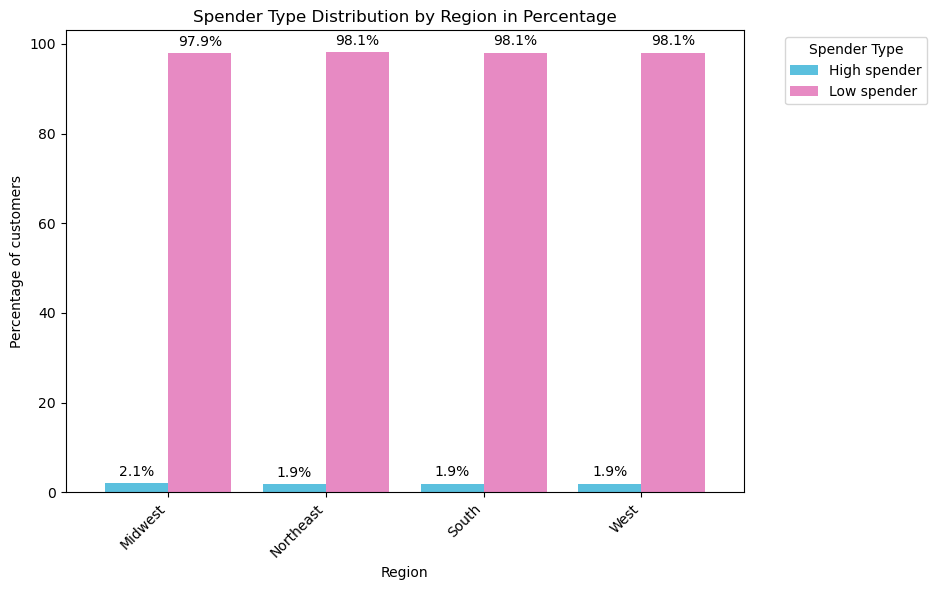

In [52]:
# Presenting region vs spender type in a visualization
region_spender_ct = pd.crosstab(df_ords_prods_cust['region'], df_ords_prods_cust['spender type'])

region_spender_pct = region_spender_ct.div(region_spender_ct.sum(axis=1), axis=0) * 100

ax = region_spender_pct.plot(kind='bar', figsize=(12,6), width=0.8, color=['#5bc0de','#e78ac3'])

plt.title('Spender Type Distribution by Region in Percentage')
plt.xlabel('Region')
plt.ylabel('Percentage of customers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Spender Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0,0,0.8,1])

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)

plt.show()

There are minimal differences in ordering habits across regions. In all regions, about 98% of customers are high spenders, with only 2% classified as low spenders. Thus, marketing strategies can be standardized with a focus on high spenders.

In [51]:
# Saving the visualization as an image
save_path = project_path / '04 Analysis' / 'Visualizations' / 'bar_spender_type_distribution.png'
ax.figure.savefig(save_path, bbox_inches='tight', dpi=300)

In [ ]:
# Exporting dataset with regional segmentation
export_path = project_path / '02 Data' / 'Prepared Data' / 'ords_prods_cust_regional_segmentation.pkl'
df_ords_prods_cust.to_pickle(export_path)

#### 05 Exclusion Flag for Low-Activity Customers

In [4]:
# Importing the dataset with regional segmentation due to memory constraints.
df_ords_prods_cust = pd.read_pickle(project_path / '02 Data' / 'Prepared Data' / 'ords_prods_cust_regional_segmentation.pkl')

In [5]:
# Counting unique orders per user to assess customer activity
df_ords_prods_cust['order_count'] = df_ords_prods_cust.groupby(['user_id'])['order_id'].transform('nunique')

In [6]:
# Creating exclusion flags for users with fewer than 5 orders

In [7]:
df_ords_prods_cust.loc[df_ords_prods_cust['order_count'] < 5, 'exclusion_flag'] = 'yes'

In [8]:
df_ords_prods_cust.loc[df_ords_prods_cust['order_count'] >= 5, 'exclusion_flag'] = 'no'

In [14]:
# Checking the output
df_ords_prods_cust.head(3)

,order_id,user_id,purchase_sequence,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spender type,median_days_since_prior_order,order frequency,gender,state,age,date_joined,n_dependants,family_status,income,region,order_count,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.00,both,Mid-range product,Regular busy,Average orders,10,New customer,6.37,Low spender,20.50,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,10,no
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.50,both,Mid-range product,Regular busy,Average orders,10,New customer,6.37,Low spender,20.50,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,10,no
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.40,both,Low-range product,Regular busy,Average orders,10,New customer,6.37,Low spender,20.50,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,10,no


In [15]:
# Checking the distribution of the exclusion flag
df_ords_prods_cust['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
no     30964518
yes     1440341
Name: count, dtype: int64

In [16]:
# Creating a dataset without low-activity users
df_ords_prods_cust_excluded = df_ords_prods_cust[df_ords_prods_cust['exclusion_flag']=='no']

In [ ]:
# Exporting dataset without low-activity customers
export_path = project_path / '02 Data' / 'Prepared Data' / 'ords_prods_cust_low_act_cust_excluded.pkl'
df_ords_prods_cust_excluded.to_pickle(export_path)

#### 06 Customer Profiling

In [3]:
# Importing the dataset with regional segmentation due to memory constraints.
df_ords_prods_cust = pd.read_pickle(project_path / '02 Data' / 'Prepared Data' / 'ords_prods_cust_low_act_cust_excluded.pkl' )

In [4]:
# Checking df_ords_prods_cust dataframe
df_ords_prods_cust.head(3)

,order_id,user_id,purchase_sequence,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,n_dependants,family_status,income,region,order_count,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,no
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,no
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,no


In [5]:
# Importing department dataset
df_department = pd.read_csv(project_path / '02 Data' / 'Prepared Data' / 'departments_wrangled.csv')

In [6]:
# Checking df_department dataframe
df_department

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


##### Young Parent

Assigning the label **young parent** to customers aged 30 or younger who have 1 to 3 dependants.

In [7]:
# Create customer profile - young parent
df_ords_prods_cust.loc[
    (df_ords_prods_cust['age'] <= 30) & 
    (df_ords_prods_cust['n_dependants'].isin([1, 2,3])),
    'customer profile'  
] = 'young_parent'

##### Single Adult

Assigning the label **single adult** to customers aged between 18 and 60 with zero dependants.

In [8]:
df_ords_prods_cust.loc[
    (df_ords_prods_cust['age'] > 18) & 
    (df_ords_prods_cust['age'] <= 60) &
    (df_ords_prods_cust['n_dependants'] == 0), 
    'customer profile'
] = 'single_adult'

##### Retired

Assigning the label **retired** to customers aged above 60 with zero dependants.

In [9]:
# Create customer profile - retired 
df_ords_prods_cust.loc[
    (df_ords_prods_cust['age'] >= 60) & 
    (df_ords_prods_cust['n_dependants'] == 0), 
    'customer profile'
] = 'retired'

##### Family

Assigning the label **family** to customers aged between 25 and 60 with income ≥ 60,000 and 1 to 3 dependants.

In [10]:
# Create customer profile - family
df_ords_prods_cust.loc[
    (df_ords_prods_cust['age'] >= 25) & 
    (df_ords_prods_cust['age'] <= 60) &
    (df_ords_prods_cust['income'] >= 60000) &
    (df_ords_prods_cust['n_dependants'].isin([1, 2, 3])),
    'customer profile'
] = 'family'

##### Budget Conscious Family

Assigning the label **budget conscious family** to customers aged between 25 and 60 with income under 60,000 and 2 to 3 dependants.

In [11]:
# Create customer profile -  budget conscious family
df_ords_prods_cust.loc[
    (df_ords_prods_cust['age'] >= 25) & 
    (df_ords_prods_cust['age'] <= 60) &
    (df_ords_prods_cust['income'] < 60000) &
    (df_ords_prods_cust['n_dependants'].isin([2, 3])),
    'customer profile'
] = 'budget_conscious_family'

##### Wealthy Professional

Assigning the label **wealthy professional** to customers aged above 20 with income greater than 100,000 and no dependants.

In [12]:
# Create customer profile - wealthy professional
df_ords_prods_cust.loc[
    (df_ords_prods_cust['age'] >= 20) & 
    (df_ords_prods_cust['income'] > 100000) &
    (df_ords_prods_cust['n_dependants'].isin([0])),
    'customer profile'
] = 'wealthy_professional'

##### Pet Owner

Assigning the label **pet owner** to customers aged above 18 who purchase products from the pets department.

In [13]:
# Create customer profile - pet owner
df_ords_prods_cust.loc[
    (df_ords_prods_cust['age'] >= 18) &
(df_ords_prods_cust['department_id'].isin([8])),
    'customer profile'
] = 'pet_owner'

In [14]:
# Distribution of customer profiles
df_ords_prods_cust['customer profile'].value_counts(dropna=True)

customer profile
family                     10329122
wealthy_professional        3547815
single_adult                3252304
young_parent                2811259
budget_conscious_family     1802473
retired                      796981
pet_owner                     93060
Name: count, dtype: int64

#### 07 Visualization of Customer Profile Distribution

This chart shows the percentage breakdown of each customer profile category.

Text(0, 0.5, 'Percentage of Customers')

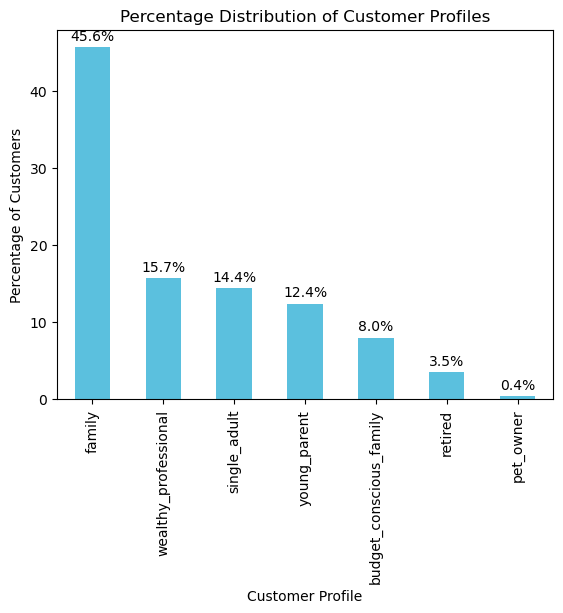

In [15]:
# Visualizing the percentage distribution of customer profiles
profile_percentages = df_ords_prods_cust['customer profile'].value_counts(normalize=True) * 100
profile_percentages = profile_percentages.round(1)

ax2 = profile_percentages.plot.bar(color='#5bc0de')

for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', padding=3)

plt.title('Percentage Distribution of Customer Profiles')
plt.xlabel('Customer Profile')
plt.ylabel('Percentage of Customers')

Families are the dominant customer profile, followed by wealthy professionals, single adults, and young parents. This consistency suggests, that marketing strategies can be standardized with a focus on high spenders and families.

In [29]:
# Saving bar chart
save_path = project_path / '04 Analysis' / 'Visualizations' / 'bar_customer_profile_distribution.png'
ax2.figure.savefig(save_path, bbox_inches='tight', dpi=300)

#### 08 Aggregation of Customer Profiles

In [ ]:
df_ords_prods_cust.groupby('customer profile').agg({'order frequency': ['mean', 'min', 'max']})

In [ ]:
df_ords_prods_cust.groupby('customer profile').agg({'spender type': ['mean', 'min', 'max']})

#### 09 Comparison of Customer Profiles Across Regions and Departments

In [16]:
# Comparing customer profiles across regions
pd.crosstab(df_ords_prods_cust['customer profile'], df_ords_prods_cust['region'])

region,Midwest,Northeast,South,West
customer profile,,,,
budget_conscious_family,415663,319597,612040,455173
family,2429709,1829546,3404707,2665160
pet_owner,21358,17734,29909,24059
retired,195296,139185,266988,195512
single_adult,758212,578916,1086800,828376
wealthy_professional,841085,610027,1175618,921085
young_parent,658808,486776,959736,705939


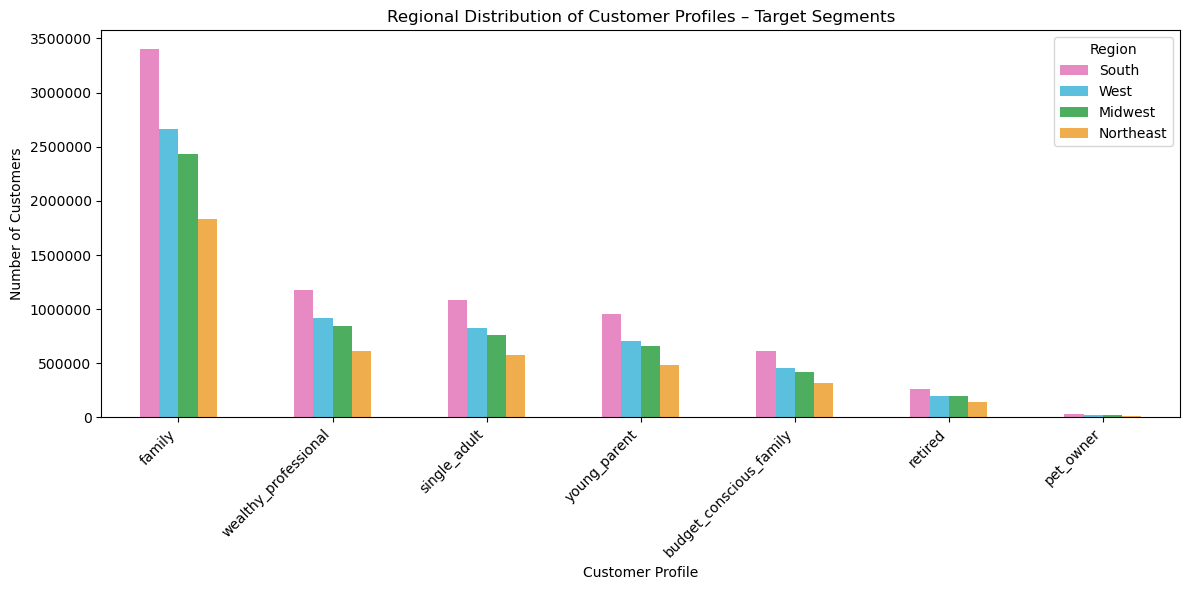

In [28]:
# Visualizing regional distribution of customer profiles
profile_region_ct = pd.crosstab(df_ords_prods_cust['customer profile'], df_ords_prods_cust['region'])

sorted_regions = profile_region_ct.sum(axis=0).sort_values(ascending=False).index
profile_region_ct = profile_region_ct[sorted_regions]

sorted_profiles = profile_region_ct.sum(axis=1).sort_values(ascending=False).index
profile_region_ct = profile_region_ct.loc[sorted_profiles]

colors = ['#e78ac3', '#5bc0de', '#4eae60', '#f0ad4e']

ax3 = profile_region_ct.plot(kind='bar', figsize=(12,6), color=colors)

plt.title('Regional Distribution of Customer Profiles – Target Segments')
plt.xlabel('Customer Profile')
plt.ylabel('Number of Customers')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')
ax3.legend(labels=profile_region_ct.columns, title='Region')
plt.tight_layout()
plt.show()

The distribution of customer profiles varies across regions. The South shows the highest volume across all profiles, followed by the West, Midwest, and Northeast, highlighting regional differences in customer behavior. Out of all profiles, family accounts for the largest share, which suggest stronger family-oriented shopping patterns. The customer profiles such as: wealthy professional, single adult, young parent and pet owner, are distributed similarly. Whereas budget conscious family and retired are the lowest. This insight makes the family segment a key target for marketing campaigns, especially in higher-volume regions where it can have the greatest impact.

In [ ]:
# Saving bar chart
save_path = project_path / '04 Analysis' / 'Visualizations' / 'regional_distribution_cus_prof.png'
ax3.figure.savefig(save_path, bbox_inches='tight', dpi=300)

In [18]:
# Comparing customer profiles with departments

In [21]:
# Distribution of customer profiles across department_ids
pd.crosstab(df_ords_prods_cust['customer profile'], df_ords_prods_cust['department_id'])

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
customer profile,,,,,,,,,,,,,,,,,,,,,
budget_conscious_family,116911,1904,60837,486443,8641,12948,181254,0,39733,2426,25094,26503,94446,43912,49511,281572,43840,18241,246586,58040,3631
family,717196,11412,380632,3100928,46551,88813,814371,0,287863,10752,143547,244508,610200,216353,353379,1762281,230836,144860,807310,335339,21991
pet_owner,0,0,0,0,0,0,0,93060,0,0,0,0,0,0,0,0,0,0,0,0,0
retired,55640,838,27181,220934,3296,5904,74386,0,19939,845,11161,14746,42776,18073,23592,131397,18361,9805,90966,25434,1707
single_adult,218529,3798,116772,952007,14886,27097,277325,0,83799,3530,45116,66639,183741,71024,104288,543435,71890,43023,311105,107232,7068
wealthy_professional,247181,3936,133120,1067744,18044,30293,283348,0,97332,3510,47999,81999,210142,74890,119406,601020,78179,48393,277465,116877,6937
young_parent,194852,3242,101604,819635,14493,23329,231769,0,75718,3192,38185,61308,162123,63257,92097,472115,63769,37302,256215,90970,6084


In [24]:
# Creating department_id dictionary to provide meaningful labels for each 'department_id' in the dataset.
department_dict = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'}

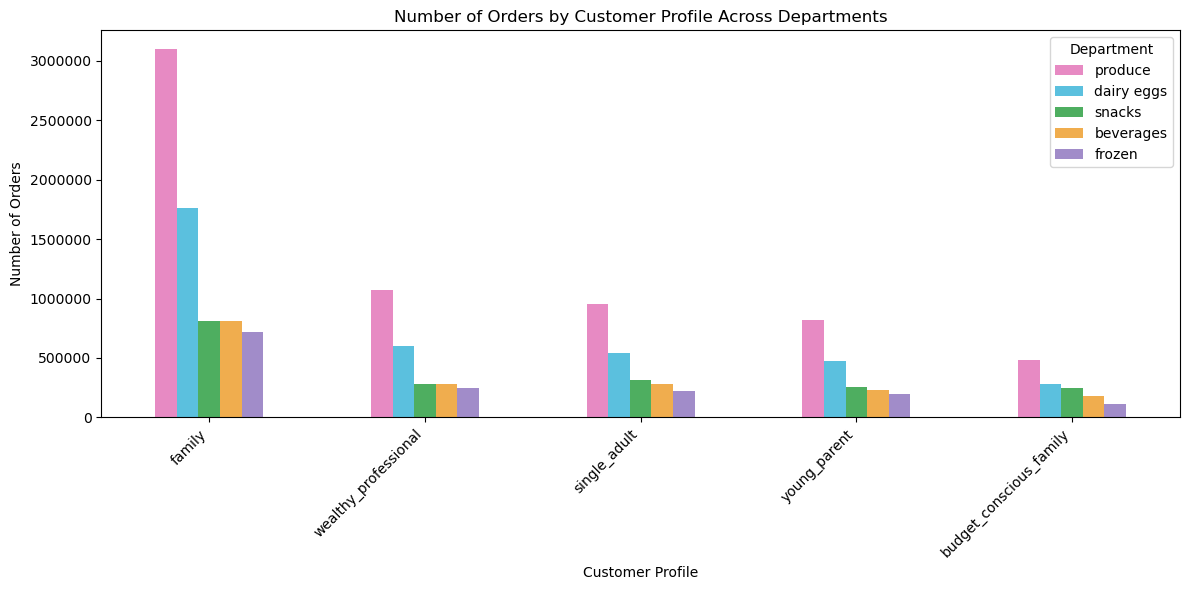

In [32]:
# Visualizing top 5 customer profiles by department
df_ords_prods_cust['department'] = df_ords_prods_cust['department_id'].map(department_dict)

department_ct = pd.crosstab(df_ords_prods_cust['customer profile'], df_ords_prods_cust['department'])

top5_departments = department_ct.sum(axis=0).sort_values(ascending=False).index[:5]
department_ct_top5 = department_ct[top5_departments]

top5_profiles = department_ct_top5.sum(axis=1).sort_values(ascending=False).index[:5]
department_ct_top5 = department_ct_top5.loc[top5_profiles]

colors = ['#e78ac3', '#5bc0de', '#4eae60', '#f0ad4e', '#a18cc9']

ax = department_ct_top5.plot(kind='bar', figsize=(12, 6), color=colors)

plt.title('Number of Orders by Customer Profile Across Departments')
plt.xlabel('Customer Profile')
plt.ylabel('Number of Orders')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')
ax.legend(title='Department')
plt.tight_layout()
plt.show()

The pattern of department preferences is remarkably consistent across customer profiles. Regardless of customer type, the top five departments in terms of order volume are Produce, Dairy Eggs, Snacks, Beverages, and Frozen. This consistency suggests that these categories include everyday items that are popular with almost everyone.

In [33]:
# Saving bar chart
save_path = project_path / '04 Analysis' / 'Visualizations' / 'bar_customer_profile_departments.png'
ax4.figure.savefig(save_path, bbox_inches='tight', dpi=300)

#### 10 Other Visualizations

##### Percentage Distribution of Orders by Department

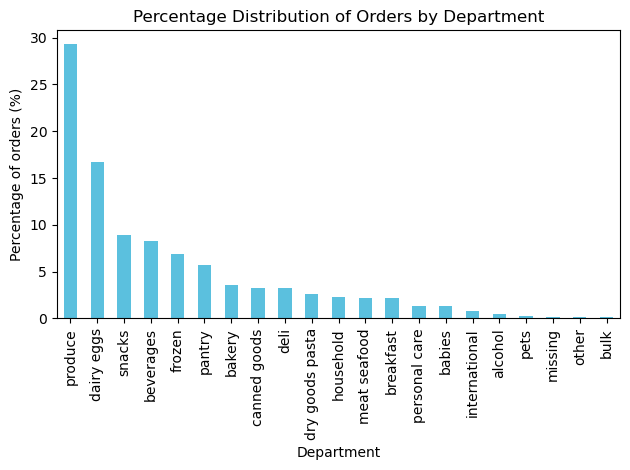

In [37]:
# Visualizing department distribution in percentage
df_ords_prods_cust['department'] = df_ords_prods_cust['department_id'].map(department_dict)

department_percent = df_ords_prods_cust['department'].value_counts(normalize=True) * 100

colors = ['#5bc0de']
ax5 = department_percent.plot(kind='bar', color=colors)

plt.title('Percentage Distribution of Orders by Department')
plt.xlabel('Department')
plt.ylabel('Percentage of orders (%)')
plt.tight_layout()
plt.show()

There are certain types of products that are more popular, namely produce, dairy & eggs, snacks, beverages, and frozen. Therefore, marketing efforts should focus particularly on these departments. However, targeted campaigns could also be developed to boost lower-performing categories such as pantry, bakery, canned goods, and deli.

In [38]:
# Saving bar chart
save_path = project_path / '04 Analysis' / 'Visualizations' / 'department_distribution.png'
ax5.figure.savefig(save_path, bbox_inches='tight', dpi=300)

##### Customer Profile Distribution Across Price Ranges

The bar chart illustrates customer profile distribution across three price ranges: low-range (`$5` or less), mid-range (`>$5–$15`), and high-range (`>$15`) products.

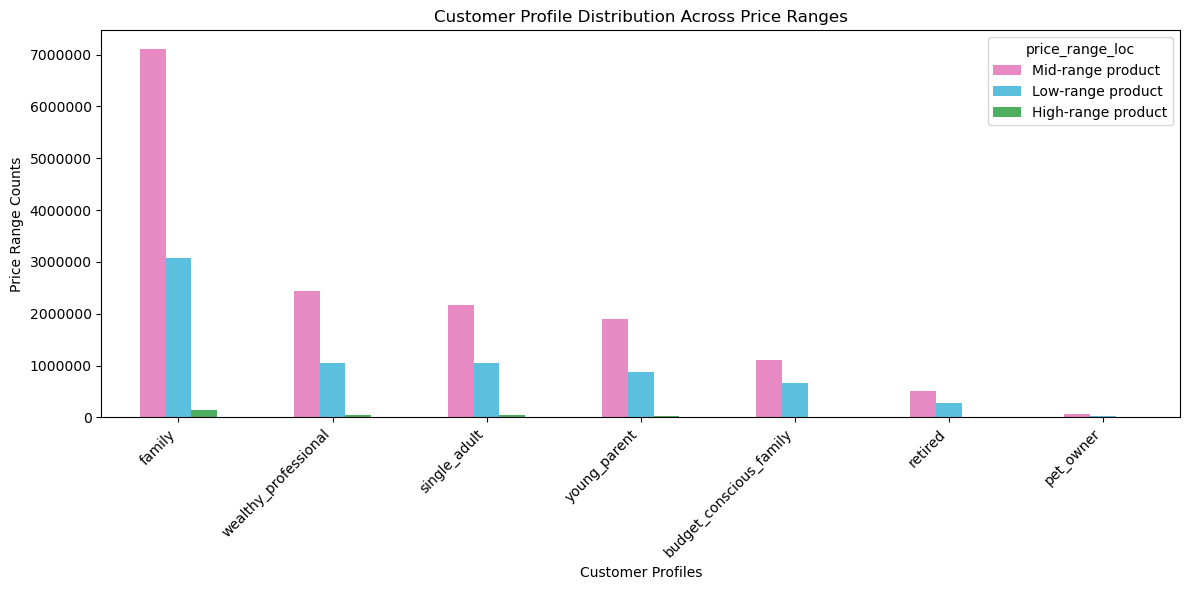

In [39]:
# Visualizing customer profile distribution across price ranges
profile_price_ct = pd.crosstab(df_ords_prods_cust['customer profile'], df_ords_prods_cust['price_range_loc'])

sorted_price_ranges = profile_price_ct.sum(axis=0).sort_values(ascending=False).index
profile_price_ct = profile_price_ct[sorted_price_ranges]

sorted_price_ranges = profile_price_ct.sum(axis=1).sort_values(ascending=False).index
profile_price_ct = profile_price_ct.loc[sorted_price_ranges]

colors = ['#e78ac3', '#5bc0de', '#4eae60', '#f0ad4e']

ax7 = profile_price_ct.plot(kind='bar', figsize=(12,6), color=colors)

plt.title('Customer Profile Distribution Across Price Ranges')
plt.xlabel('Customer Profiles')
plt.ylabel('Price Range Counts')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')
ax.legend(title='Price range loc')
plt.tight_layout()
plt.show()

Most customers primarily purchase mid-range and low-range products, with budget-conscious families, retirees and pet owners rarely buying high-range items.

In [41]:
# Saving visualization
save_path = project_path / '04 Analysis' / 'Visualizations' / 'cus_prof_by_range.png'
ax7.figure.savefig(save_path, bbox_inches='tight', dpi=300)

##### Customer Profile Distribution Across Order Frequency

This bar chart illustrates customer profile distribution across oder frequency. Customer order frequency is categorized as “Frequent” (median days since prior order ≤ 10), “Regular” (median > 10 and ≤ 20), and “Non-frequent” (median > 20).

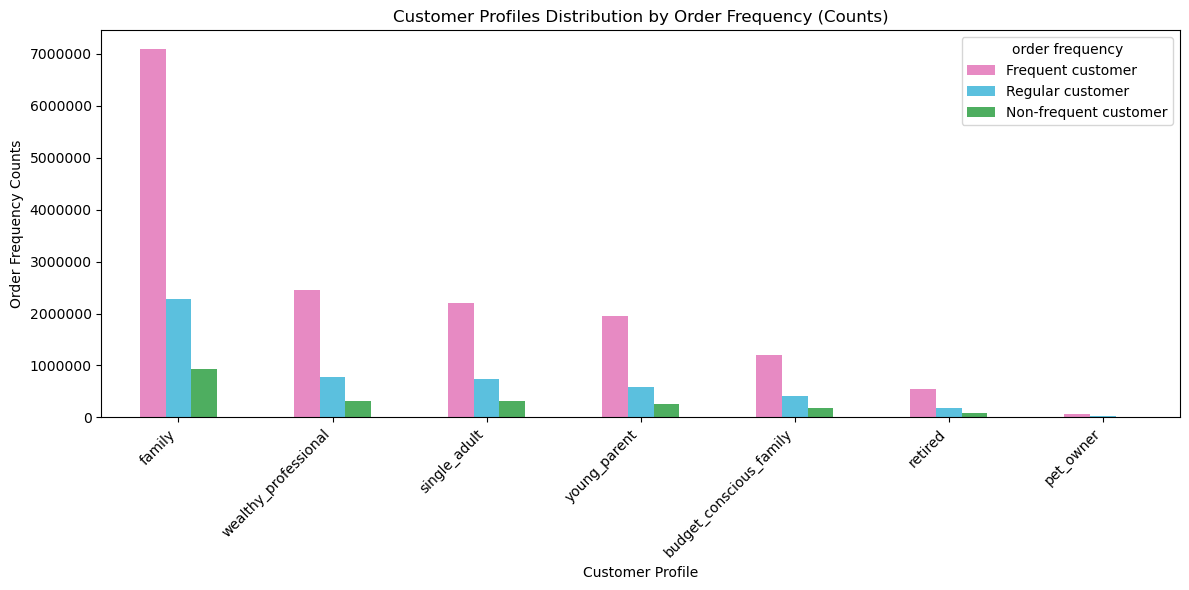

In [42]:
# Visualizing customer profile distribution across oder frequency
profile_order_ct = pd.crosstab(df_ords_prods_cust['customer profile'], df_ords_prods_cust['order frequency'])

sorted_frequencies = profile_order_ct.sum(axis=0).sort_values(ascending=False).index
profile_order_ct = profile_order_ct[sorted_frequencies]

sorted_profiles = profile_order_ct.sum(axis=1).sort_values(ascending=False).index
profile_order_ct = profile_order_ct.loc[sorted_profiles]

colors = ['#e78ac3', '#5bc0de', '#4eae60', '#f0ad4e']

ax8 = profile_order_ct.plot(kind='bar', figsize=(12,6), color=colors)

plt.title('Customer Profiles Distribution by Order Frequency (Counts)')
plt.xlabel('Customer Profile')
plt.ylabel('Order Frequency Counts')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')
ax.legend(title='Order Frequency')
plt.tight_layout()
plt.show()

Families, wealthy professionals, single adults, and young parents are the most frequent customers. Frequent customers also make up the largest share in other customer profiles, followed by regular and non-frequent customers.

In [43]:
# Saving visualization
save_path = project_path / '04 Analysis' / 'Visualizations' / 'cus_pro_order_freq.png'
ax8.figure.savefig(save_path, bbox_inches='tight', dpi=300)

##### Customer Profiles Distribution Across Loyalty FLag

The bar chart illustrates the distribution of users based on their brand loyalty—that is, how frequently they return to shop on Instacart. Users are classified by brand loyalty based on max_order value: 'Loyal customer' (>40), 'Regular customer' (11–40), and 'New customer' (≤10) orders.

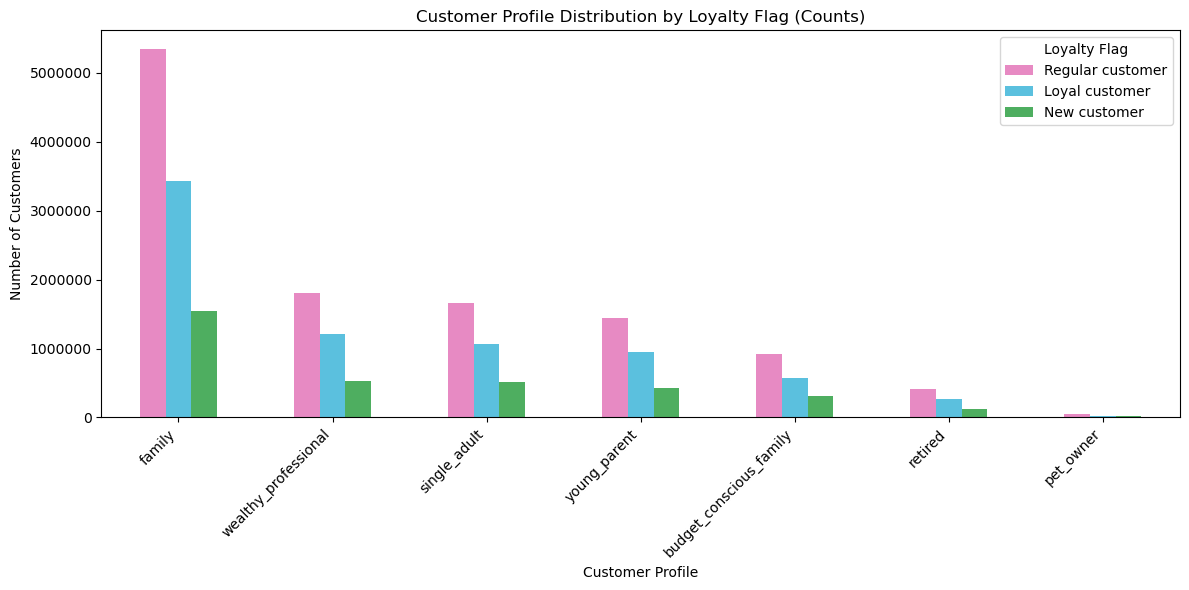

In [44]:
# Visualizing customer profile distribution across loyalty flag
profile_order_ct = pd.crosstab(df_ords_prods_cust['customer profile'], df_ords_prods_cust['loyalty_flag'])

sorted_frequencies = profile_order_ct.sum(axis=0).sort_values(ascending=False).index
profile_order_ct = profile_order_ct[sorted_frequencies]

sorted_profiles = profile_order_ct.sum(axis=1).sort_values(ascending=False).index
profile_order_ct = profile_order_ct.loc[sorted_profiles]

colors = ['#e78ac3', '#5bc0de', '#4eae60', '#f0ad4e']

ax9 = profile_order_ct.plot(kind='bar', figsize=(12, 6), color=colors)

plt.title('Customer Profile Distribution by Loyalty Flag (Counts)')
plt.xlabel('Customer Profile')
plt.ylabel('Number of Customers')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')
ax9.legend(title='Loyalty Flag')
plt.tight_layout()
plt.show()

The largest group of users are regular customers, followed by loyal customers, with new customers making up the smallest segment. Thus the company should mainly focus on retaining regular customers and encouraging them to become loyal users through loyalty programs or personalized offers.

In [ ]:
# Saving visualization
save_path = project_path / '04 Analysis' / 'Visualizations' / 'cus_pro_loyalty.png'
ax9.figure.savefig(save_path, bbox_inches='tight', dpi=300)

#### 11 Recommendations

Marketing efforts should focus on the top-performing customer profiles such as families, wealthy professionals, single adults, and young parents, prioritizing popular departments like produce, dairy and eggs, snacks, and beverages. Campaigns should highlight mid-range and low-range products to align with typical spending habits. For budget-conscious families and retirees, targeted promotions on affordable products can help boost engagement. Additionally, introducing loyalty programs and personalized offers could increase purchase frequency across all customer groups and encourage regular customers to become loyal users.

In [ ]:
# Exporting final dataset 
export_path = project_path / '02 Data' / 'Prepared Data' / 'ords_prods_cust_final.pkl'
df_ords_prods_cust.to_pickle(export_path)